In [1]:
getwd()

[1] "/home/kaliyev/FDA review/notebooks"

In [1]:
dta <- read.csv("../weather_data/x.csv", header = TRUE)

x <- dta
y <- read.csv("../weather_data/smooth_y.csv", header = TRUE)

tt <- seq(0, 1, length.out = 365)

head(dta, n = 5)

,X0.0,X0.0027472527472527475,X0.005494505494505495,X0.008241758241758242,X0.01098901098901099,X0.013736263736263736,X0.016483516483516484,X0.019230769230769232,X0.02197802197802198,X0.024725274725274724,⋯,X0.9752747252747253,X0.978021978021978,X0.9807692307692307,X0.9835164835164835,X0.9862637362637363,X0.989010989010989,X0.9917582417582418,X0.9945054945054945,X0.9972527472527473,X1.0
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-3.6,-3.1,-3.4,-4.4,-2.9,-4.5,-5.5,-3.1,-4.0,-5.0,⋯,-2.2,-1.9,-2.2,-1.7,-2.3,-2.9,-4.0,-3.2,-2.8,-4.2
2,-4.4,-4.2,-5.3,-5.4,-5.6,-7.1,-5.8,-5.4,-6.8,-6.4,⋯,-3.8,-3.4,-3.4,-3.6,-3.6,-5.9,-5.0,-3.6,-4.9,-5.7
3,-3.8,-3.5,-4.6,-5.0,-4.1,-6.1,-5.5,-3.9,-5.4,-5.9,⋯,-2.2,-2.4,-2.6,-3.0,-3.0,-4.4,-4.7,-3.4,-3.3,-4.8
4,-1.4,-1.6,-2.5,-2.3,-2.4,-3.7,-2.6,-2.6,-4.1,-3.8,⋯,-1.4,-0.6,-0.7,-1.0,-0.7,-3.1,-1.6,-1.0,-2.6,-2.4
5,-5.8,-5.6,-7.3,-7.0,-6.7,-8.9,-7.5,-6.9,-8.9,-8.8,⋯,-4.9,-4.9,-5.1,-5.0,-5.1,-7.7,-6.9,-4.8,-6.1,-6.9


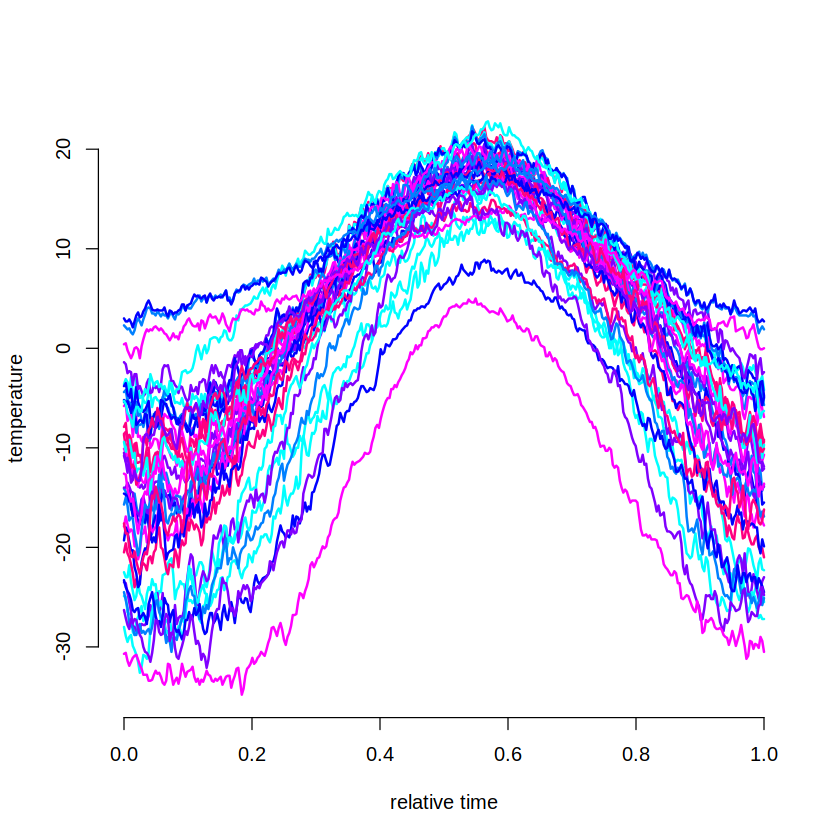

In [2]:
# plot the functional data with colors corresponding to y
cx <- rainbow(12)[7:12]

matplot(tt, t(x), type="l", lty=1, col=cx, xlab="relative time", 
        ylab="temperature", bty="n", lwd=2)


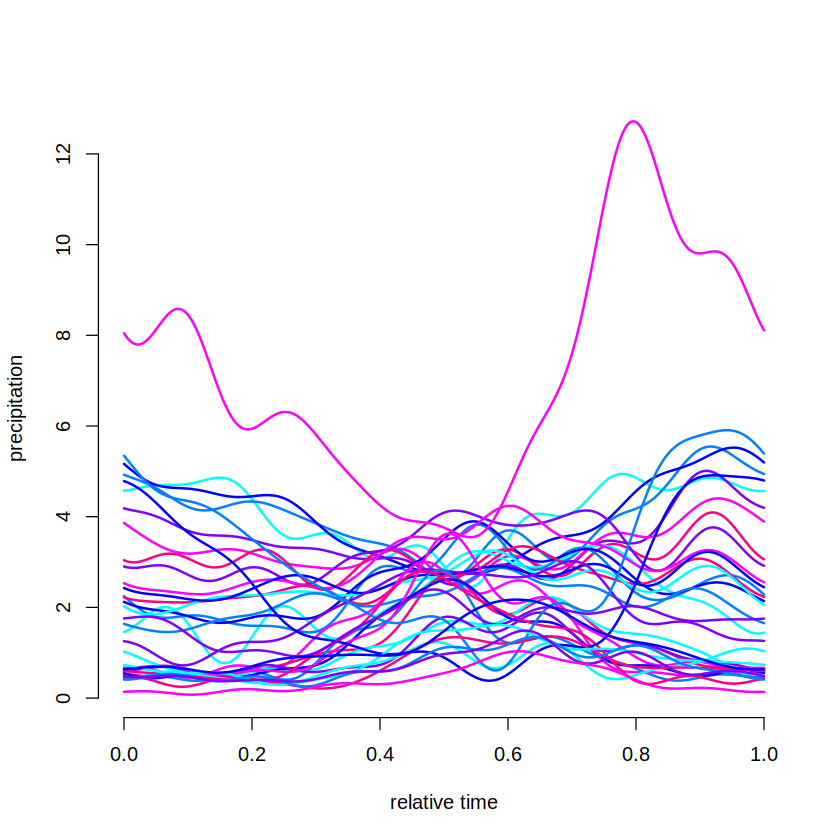

In [3]:
# Plot each row of y with a different color
matplot(tt, t(y), type="l", lty=1, col=cx, xlab="relative time", 
        ylab="precipitation", bty="n", lwd=2)


In [4]:
x <- as.matrix(x) # 35 * 365
y <- as.matrix(y) # 35 * 365

In [5]:
set.seed(42)


train_ind <- sample(1:nrow(y), floor(0.8 * nrow(y)))  # Training indices
test_ind <- setdiff(1:nrow(y), train_ind)             


x_train <- x[train_ind, ]
y_train <- y[train_ind, ]
x_test <- x[test_ind, ]
y_test <- y[test_ind, ]

# x_train_centered <- t(apply(x_train, 1, function(row) scale(row, scale = FALSE)))
# x_test_centered <- t(apply(x_test, 1, function(row) scale(row, scale = FALSE)))


dim(x_train)
dim(y_train)

[1]  28 365

[1]  28 365

In [6]:
# pffr Model Setup and Prediction
library(refund)

tt <- seq(0, 1, length.out = 365)

formula <- y_train ~ 1 + ffpc(x_train, yind = tt, xind = tt)

# Train the pffr model
model <- pffr(as.formula(formula), 
              algorithm = "bam" , 
              data = list(y_train = y_train, x_train = x_train))

summary(model)


Family: gaussian 
Link function: identity 

Formula:
y_train ~ 1 + ffpc(x_train, yind = tt, xind = tt)

Constant coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.31244    0.07349   45.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Smooth terms & functional coefficients:
                         edf Ref.df       F p-value    
Intercept(yindex)     13.162 19.000   4.837  <2e-16 ***
ffpc(x_train,tt,tt)1   7.999  8.000 118.083  <2e-16 ***
ffpc(x_train,tt,tt)2   7.991  7.998 107.866  <2e-16 ***
ffpc(x_train,tt,tt)3   7.849  7.901 176.640  <2e-16 ***
ffpc(x_train,tt,tt)4   7.722  7.845  64.879  <2e-16 ***
ffpc(x_train,tt,tt)5   6.730  7.143 178.322  <2e-16 ***
ffpc(x_train,tt,tt)6   6.409  6.859 273.626  <2e-16 ***
ffpc(x_train,tt,tt)7   6.782  7.198  34.843  <2e-16 ***
ffpc(x_train,tt,tt)8   6.275  6.784 134.691  <2e-16 ***
ffpc(x_train,tt,tt)9   5.909  6.424  23.462  <2e-16 ***
ffpc(x_train,tt,tt)10  6.263  6.753 121.03

In [7]:
predictions <- predict(model, newdata = list(x_train = x_test))

In [8]:
dim(predictions)

[1]   7 365

In [9]:
dim(y_test)

[1]   7 365

In [10]:
rmse <- sqrt(mean((y_test - predictions)^2))
print(rmse)


[1] 2.103705


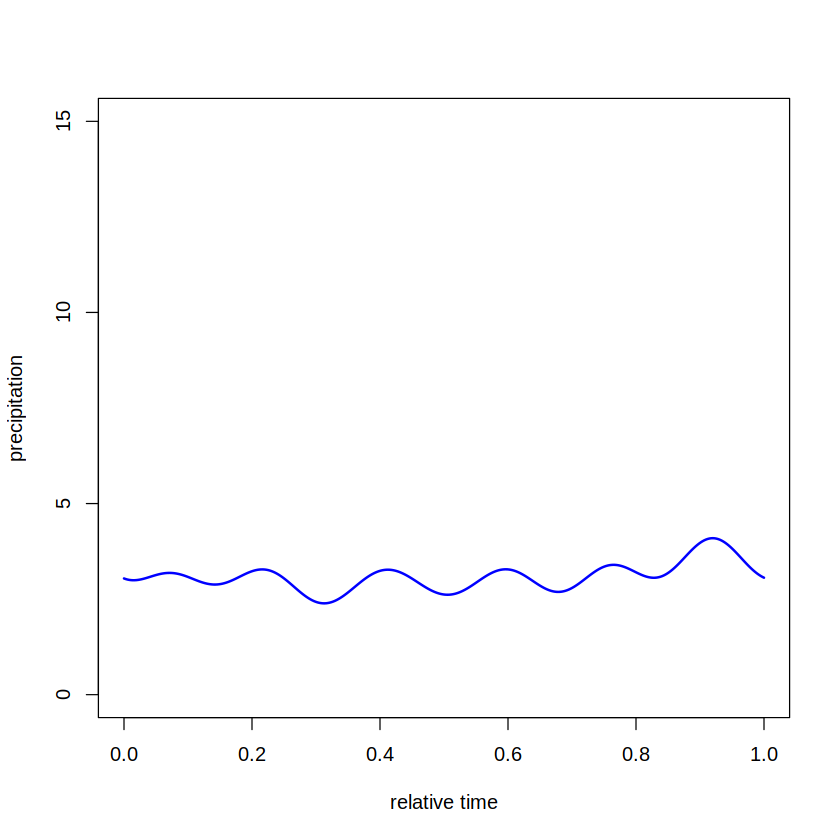

In [11]:
# Assuming `tt` is the time vector and `y_test` is a matrix with observations
plot(tt, y_test[1, ], type = "l", col = "blue", lwd = 2,
     xlab = "relative time", ylab = "precipitation", ylim = c(0, 15))


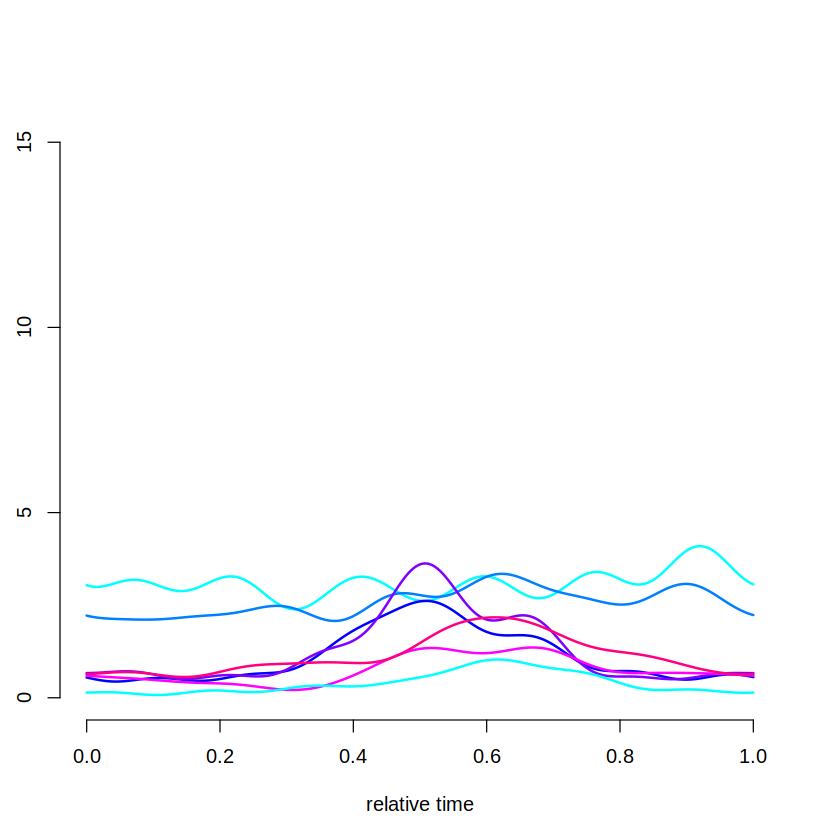

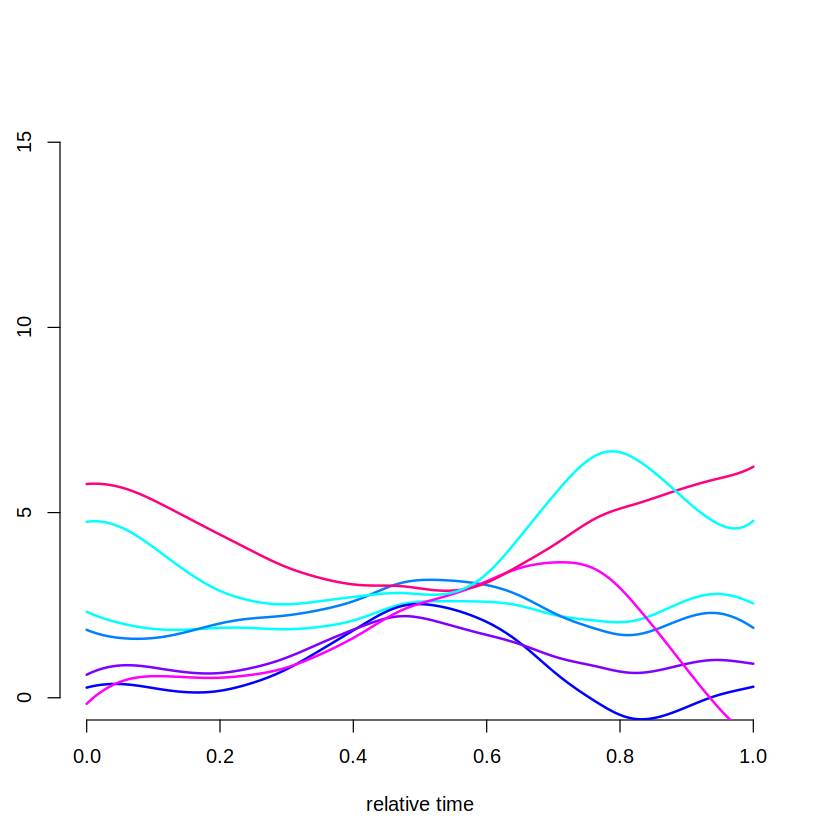

In [12]:
# Set plot dimensions in inches (for example, width = 12, height = 5)
par(pin = c(6, 5))

# Plot the first row of y_test with wider dimensions
matplot(tt, t(y_test), type = "l", lty = 1, col = cx, 
        xlab = "relative time", ylab = "real precipitation", bty = "n", lwd = 2, ylim = c(0, 15))

# Plot the first row of y_test with wider dimensions
matplot(tt, t(predictions), type = "l", lty = 1, col = cx, 
        xlab = "relative time", ylab = "pred. precipitation", bty = "n", lwd = 2, ylim = c(0, 15))



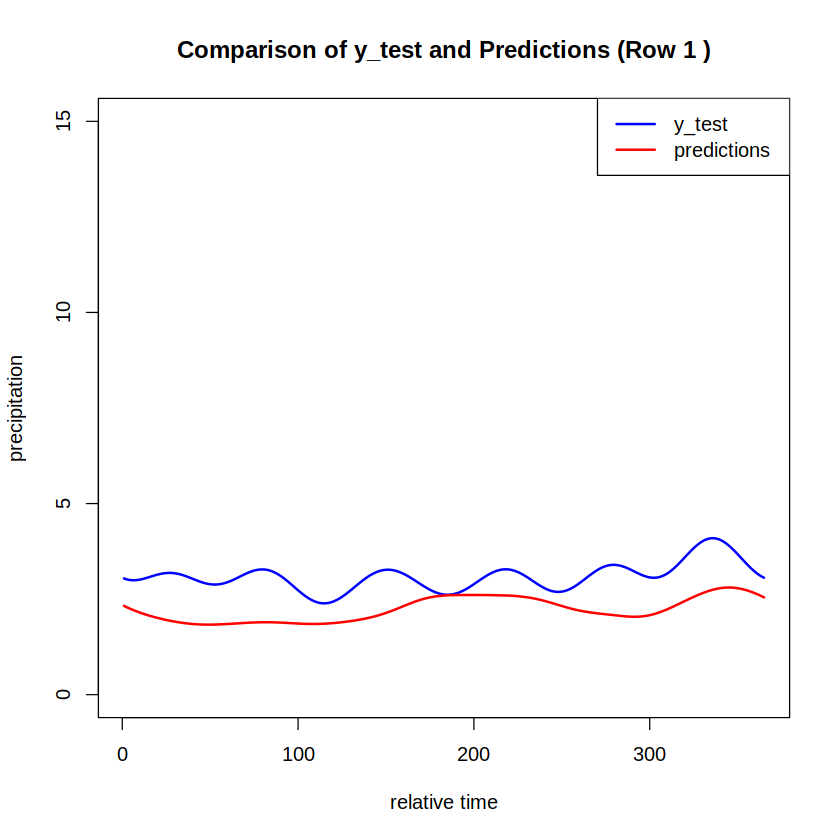

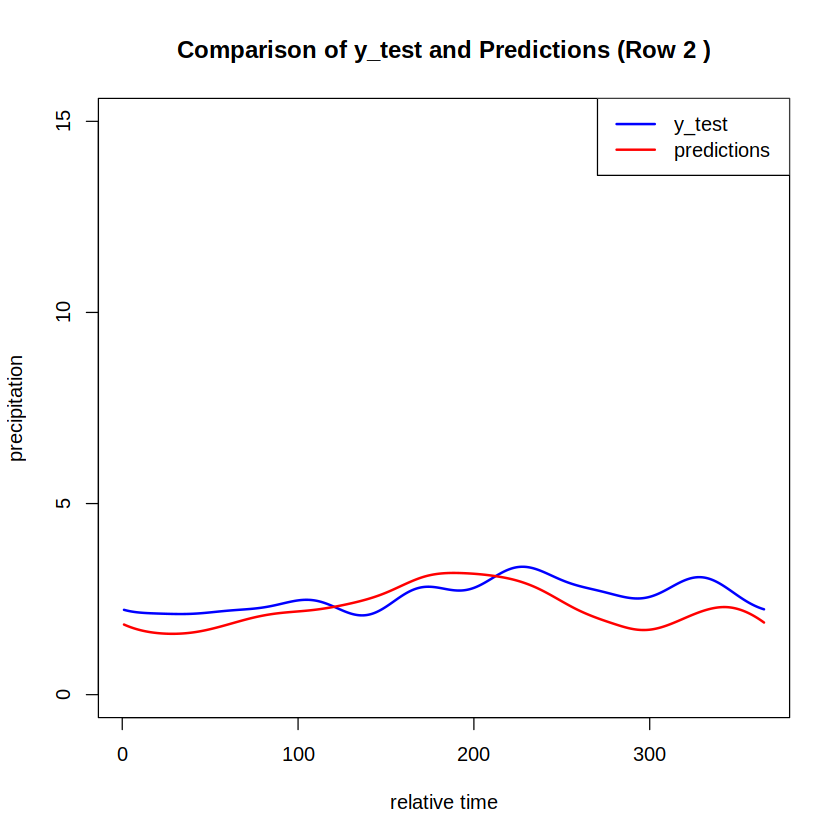

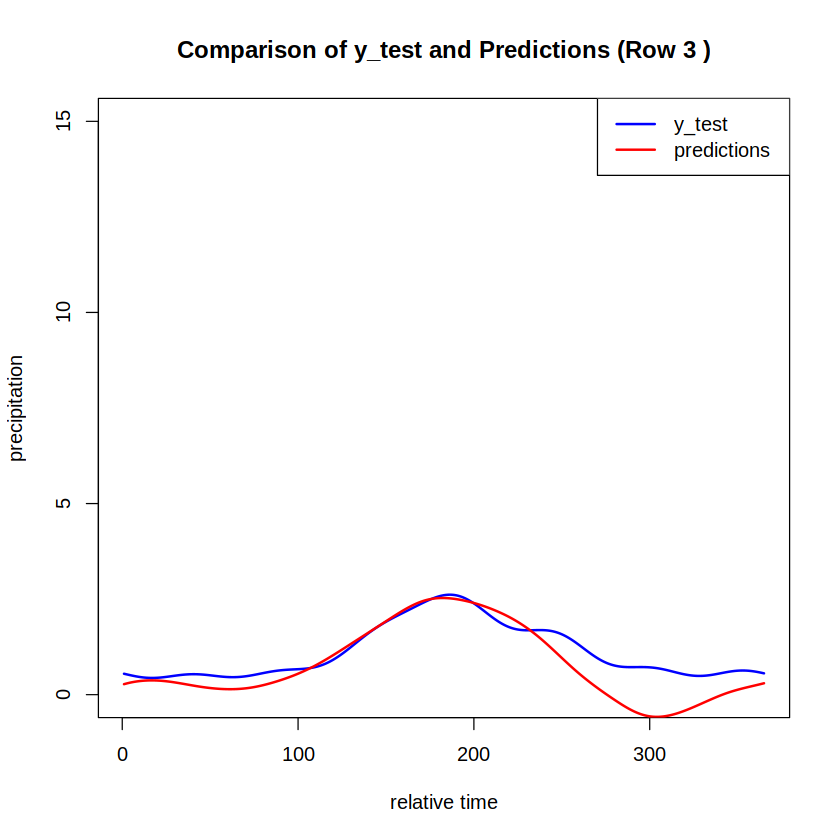

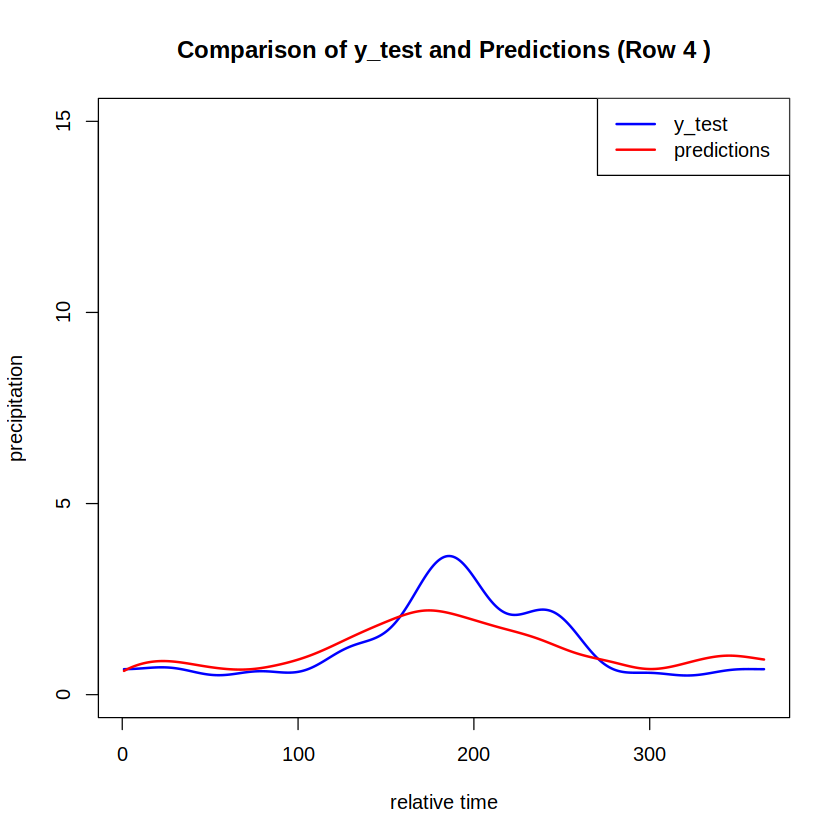

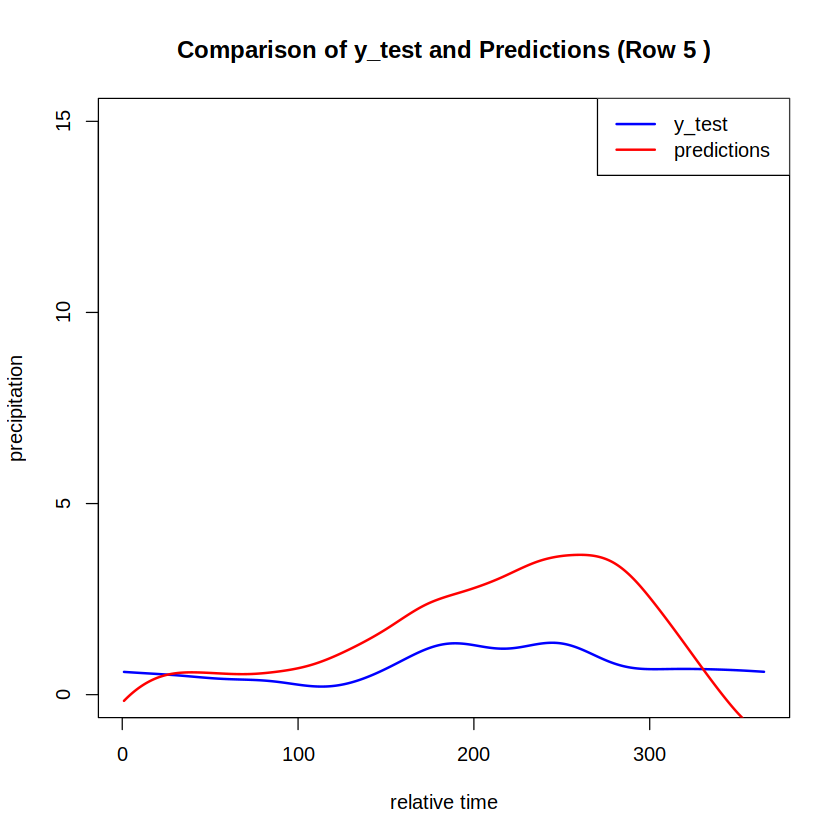

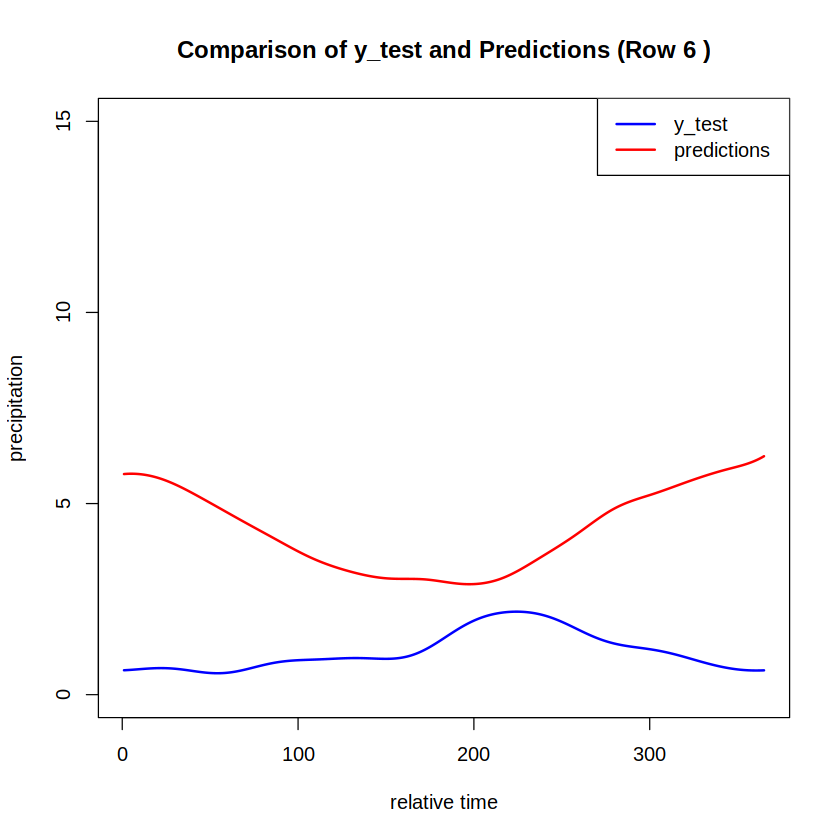

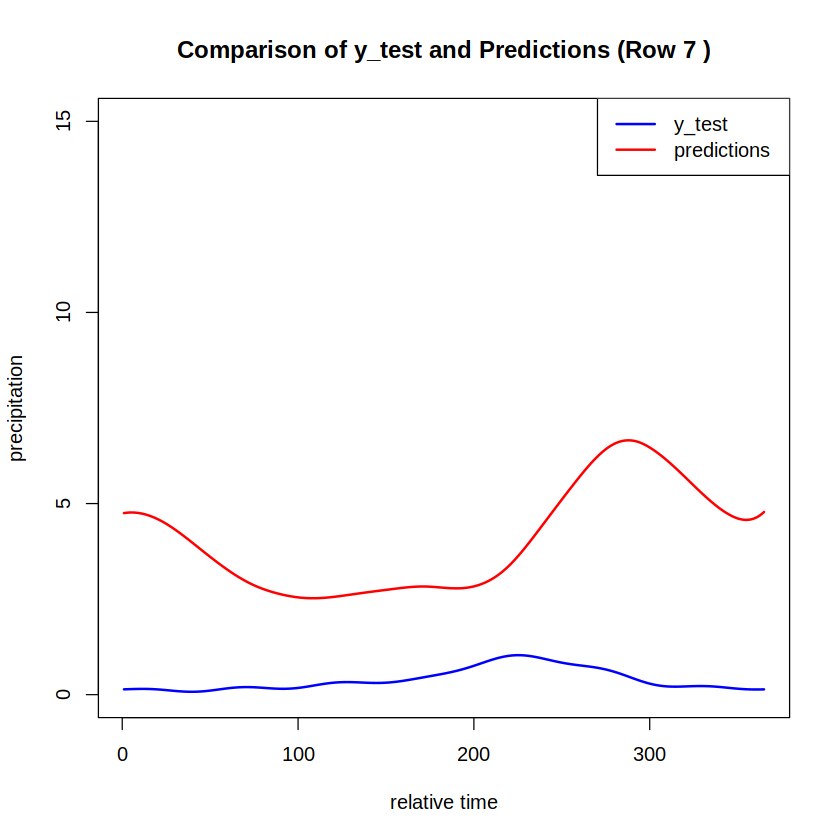

In [13]:
# Assuming tt is a sequence of values matching the number of columns in y_test
tt <- seq(1, ncol(y_test))
n <- nrow(y_test)

# Loop over each row
for (i in 1:n) {
    # Plot y_test for the current row
    plot(tt, y_test[i, ], type = "l", col = "blue", lwd = 2,
         xlab = "relative time", ylab = "precipitation",
         main = paste("Comparison of y_test and Predictions (Row", i, ")"),
         ylim = c(0, 15))
    
    # Add predictions for the current row
    lines(tt, predictions[i, ], col = "red", lwd = 2)
    
    # Add a legend for clarity
    legend("topright", legend = c("y_test", "predictions"), col = c("blue", "red"), lwd = 2)
}


In [13]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2419952,129.3,4889217,261.2,3644859,194.7
Vcells,4752816,36.3,38319405,292.4,59874069,456.9


In [1]:
set.seed(42)

dta1 <- read.csv("../weather_data/smooth_x.csv", header = TRUE)

x <- dta1
y <- read.csv("../weather_data/smooth_y.csv", header = TRUE)

tt <- seq(0, 1, length.out = 365)

x <- as.matrix(x) # 35 * 365
y <- as.matrix(y) # 35 * 365

train_ind <- sample(1:nrow(y), floor(0.8 * nrow(y)))  
test_ind <- setdiff(1:nrow(y), train_ind)             

x_train <- x[train_ind, ]
y_train <- y[train_ind, ]
x_test <- x[test_ind, ]
y_test <- y[test_ind, ]


dim(x_train)
dim(y_train)

[1]  28 365

[1]  28 365

In [2]:
tt <- seq(1, ncol(y_test))

is.numeric(tt)


[1] TRUE

In [3]:
library(FDboost)
library(refund)

print("Starting FDboost model...") 
response <- response_vars[1]

# Create formula
form <- paste(response, " ~ 1 + ", paste(
  paste0("bsignal(", pred_vars,
         ", cycle)"),
  collapse = " + "),
  " + bbsc(age)",
  " + bbsc(ht)",
  " + bbsc(wt)",
  " + bolsc(sex, df = 2)",
  "+ brandomc(cond)"
)

train <- as.list(train)
train$cycle <- cycle
train[pred_vars] <- lapply(train[pred_vars], function(x) scale(x, scale=F))
test <- as.list(test)
test$cycle <- cycle
test[pred_vars] <- lapply(test[pred_vars], function(x) scale(x, scale=F))

# initialize the model
m <- FDboost(as.formula(form),
             data = train,
             timeformula = ~ bbs(cycle, df = 5),
             control=boost_control(mstop = 1000, nu = 0.1))

set.seed(123)
appl1 <- applyFolds(m, folds = mboost::cv(rep(1, length(unique(m$id))), 
                                          B = 5), 
                    grid = 1:1000)
## plot(appl1)
m[mstop(m)]



Loading required package: mboost

Loading required package: parallel

Loading required package: stabs

This is FDboost 0.3-1. 



[1] "Starting FDboost model..."
Error in if (lambdai == 0) { : argument is of length zero


Use a smooth offset.



ERROR: Error in bl1$get_call: $ operator is invalid for atomic vectors


In [4]:
dim(y_train)  # Should be n x t
dim(x_train)  # Should be n x t
length(tt)    # Should match ncol(y_train) and ncol(x_train)


[1]  28 365

[1]  28 365

[1] 365